In [49]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u, constants as c
# import ugradio as ugr

# full width notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Tick formatting
from matplotlib.ticker import MultipleLocator

# General plot parameters
from pylab import rcParams
rcParams["axes.linewidth"]  = 2
rcParams["font.size"]  = 14



# Retina format plots
%config InlineBackend.figure_format = 'retina'


# Figure Insets
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [50]:
divisor = 2
sample_freq = (62.5 / divisor) * u.MHz 
dt = (1 / sample_freq).to(u.ns)

N_samples = 16000

# sampling_time = (N_samples * dt).to(u.s)
times = np.arange(0,N_samples) * dt.to(u.us)

# freqs = (np.fft.fftfreq(N_samples, d=dt)).to(u.MHz)
scaling_factor = 1.0 / np.iinfo(np.int16).max

dft_samples = 16000
delta_nu = (1 / (dft_samples * dt.to(u.s))).to(u.MHz) # Freq per dft bin
dft_f_range = delta_nu.value * (np.arange(0,dft_samples) - dft_samples/2)

In [51]:
# the 0.1 is because... 100mV on the pico
raw_noise_data = np.loadtxt('noise_32.csv',delimiter = ',',unpack=False, dtype = np.int16)
noise_data = ((((0.1 * raw_noise_data / ( np.iinfo(raw_noise_data[0][0].dtype).max)))) * u.V).to(u.mV)

In [52]:
mean_noise_voltage = np.mean(noise_data[0].to(u.V))
mean_noise_voltage_sq = np.mean(noise_data[0].to(u.V)**2)
mean_noise_voltage_rms = np.sqrt(np.mean(noise_data[0].to(u.V)**2))



mean_noise_mV = mean_noise_voltage.to(u.mV).value
std_noise_mV = np.std(noise_data[0].to(u.mV)).value

# Define Gaussian distribution (Normalized when A = 1)
def gaussian(x, mu, sigma,A):
    return A*((2*np.pi*sigma**2)**(-1/2))*np.exp(-((x-mu)**2/(2*sigma**2)))




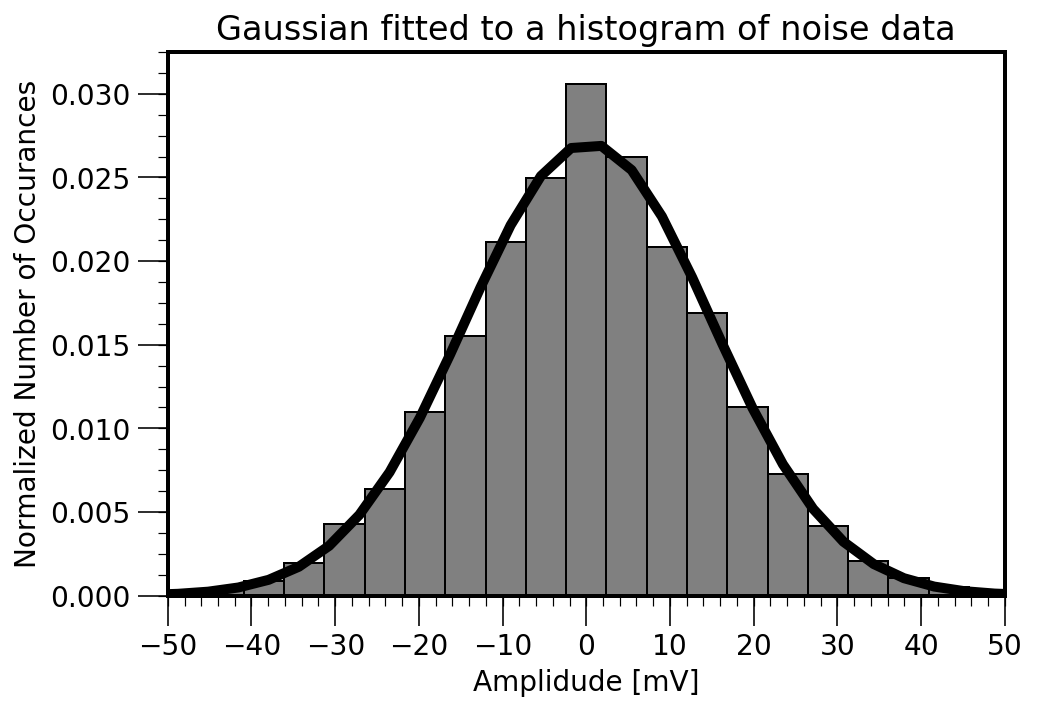

In [53]:
noise_gauss_x = np.linspace(-6*std_noise_mV,6*std_noise_mV)
noise_gauss = gaussian(noise_gauss_x, mean_noise_mV, std_noise_mV,1)

fig, ax = plt.subplots(figsize = (7.5,5))

ax.hist(noise_data[0],
        bins = 25,
        color = 'grey',
        edgecolor = 'black',
        normed = True)

ax.plot(noise_gauss_x,
        noise_gauss,
        color = 'black',
        linewidth = 5)

ax.set_xlabel('Amplidude [mV]')
ax.set_ylabel('Normalized Number of Occurances')
ax.set_xlim(-50,50)
ax.set_ylim(0,0.0325)

ax.yaxis.set_major_locator(MultipleLocator(0.005))
ax.yaxis.set_minor_locator(MultipleLocator(0.00125)) 
ax.tick_params(which='major', length = 15)
ax.tick_params(which='minor', length = 5)

ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(2)) 

ax.set_title('Gaussian fitted to a histogram of noise data')
plt.show()
fig.savefig('histogram_3_7.pdf', dpi = 'figure', format = 'pdf', transparent = True, bbox_inches = 'tight')

In [54]:
noise_PF = np.loadtxt('noise_PF.csv',delimiter = ',')

In [55]:
noise_PF_avg = np.mean(noise_PF, axis = 0)

In [56]:
dft_samples = 16000
delta_nu = (1 / (dft_samples * dt.to(u.s))).to(u.MHz) # Freq per dft bin
dft_f_range = delta_nu.value * (np.arange(0,dft_samples) - dft_samples/2)

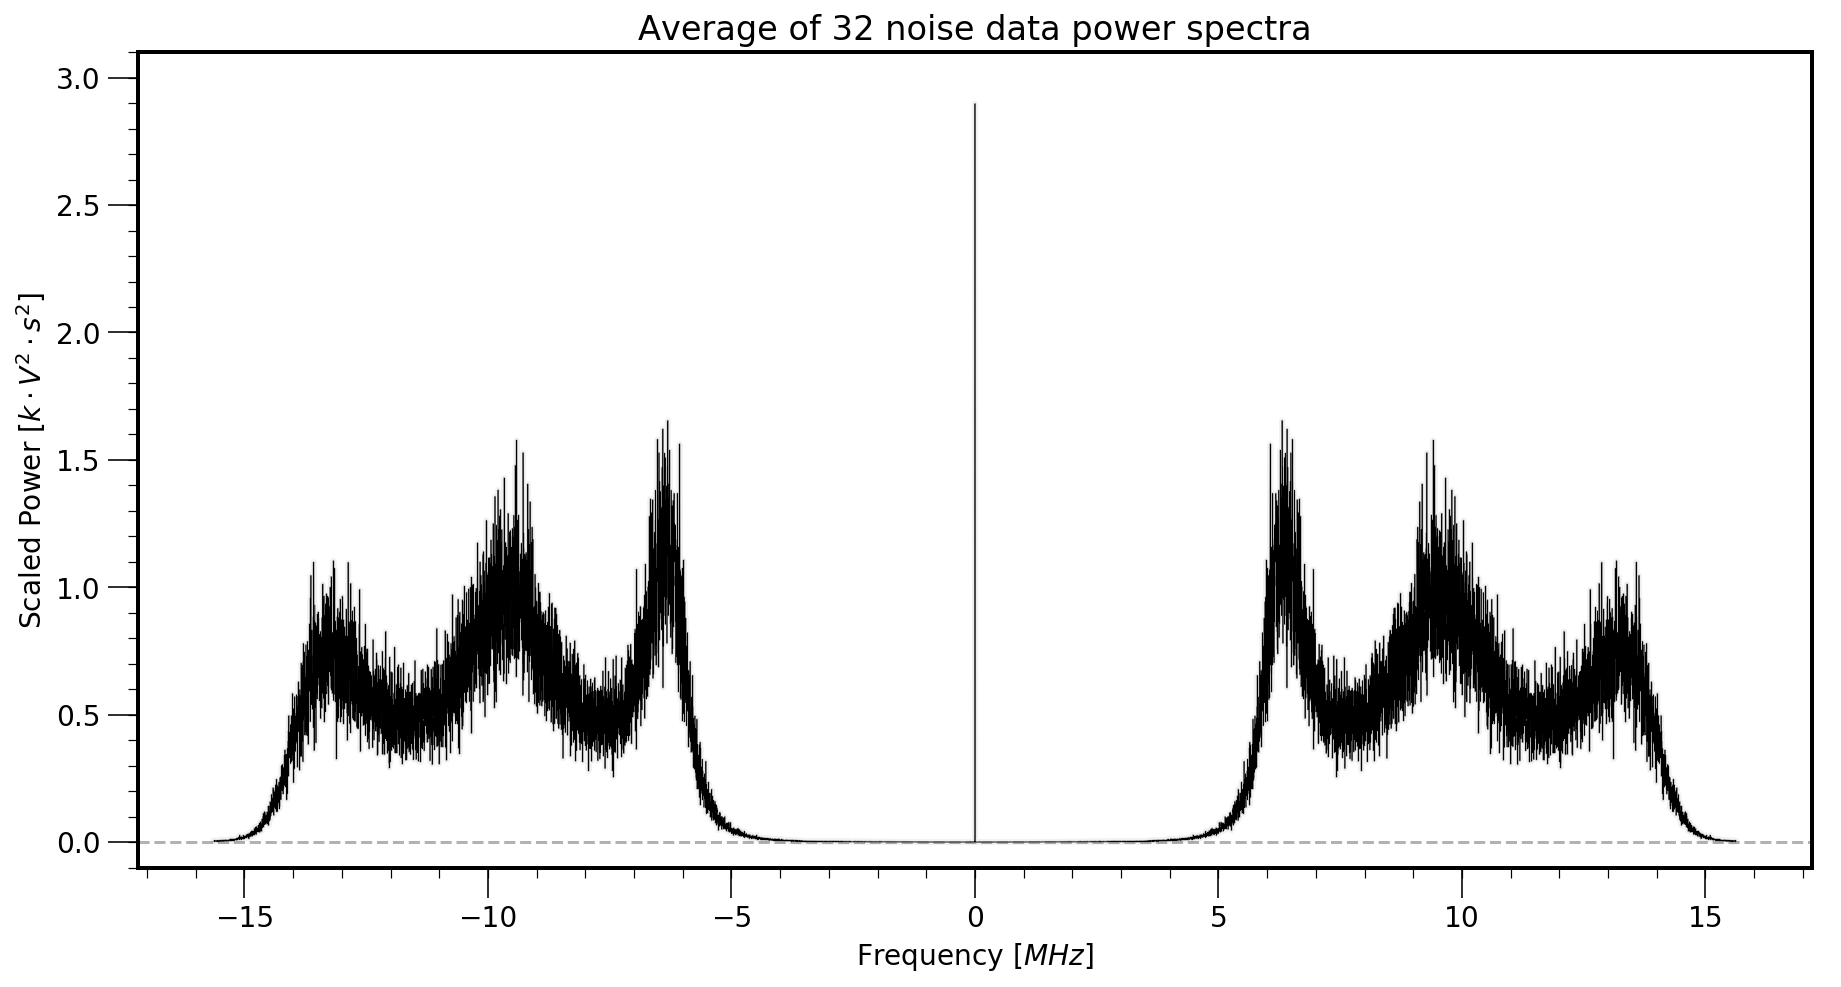

In [57]:
fig, ax = plt.subplots(figsize = (15,7.5))

PLOT_SCALE = 1e12

ax.plot(dft_f_range,
        noise_PF_avg/ PLOT_SCALE,
        color = 'black',
        linewidth = 0.3,
        alpha = 1, zorder = 3)

ax.plot(dft_f_range,
        noise_PF_avg / PLOT_SCALE,
        color = 'grey',
        linewidth = 1,
        alpha = 0.5, zorder = 2)

ax.plot(dft_f_range,
        noise_PF_avg / PLOT_SCALE,
        color = 'grey',
        linewidth = 3,
        alpha = 0.1, zorder = 0)

# Plot baseline
ax.axhline(0, color = 'black', ls = '--', alpha = 0.3, zorder = 0)

ax.set_ylim(-0.1,3.1)
# ax.set_xlim(-6.4, 6.4)
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(.1)) 
ax.tick_params(which='major', length = 15)
ax.tick_params(which='minor', length = 5)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1)) 

ax.set_xlabel(r'Frequency $[MHz]$')
ax.set_ylabel(r'Scaled Power $[k \cdot V^2 \cdot s^2]$')

ax.set_title('Average of 32 noise data power spectra')
fig.savefig('average_noise_power_3_7.pdf', dpi = 'figure', format = 'pdf', transparent = True)


plt.show()

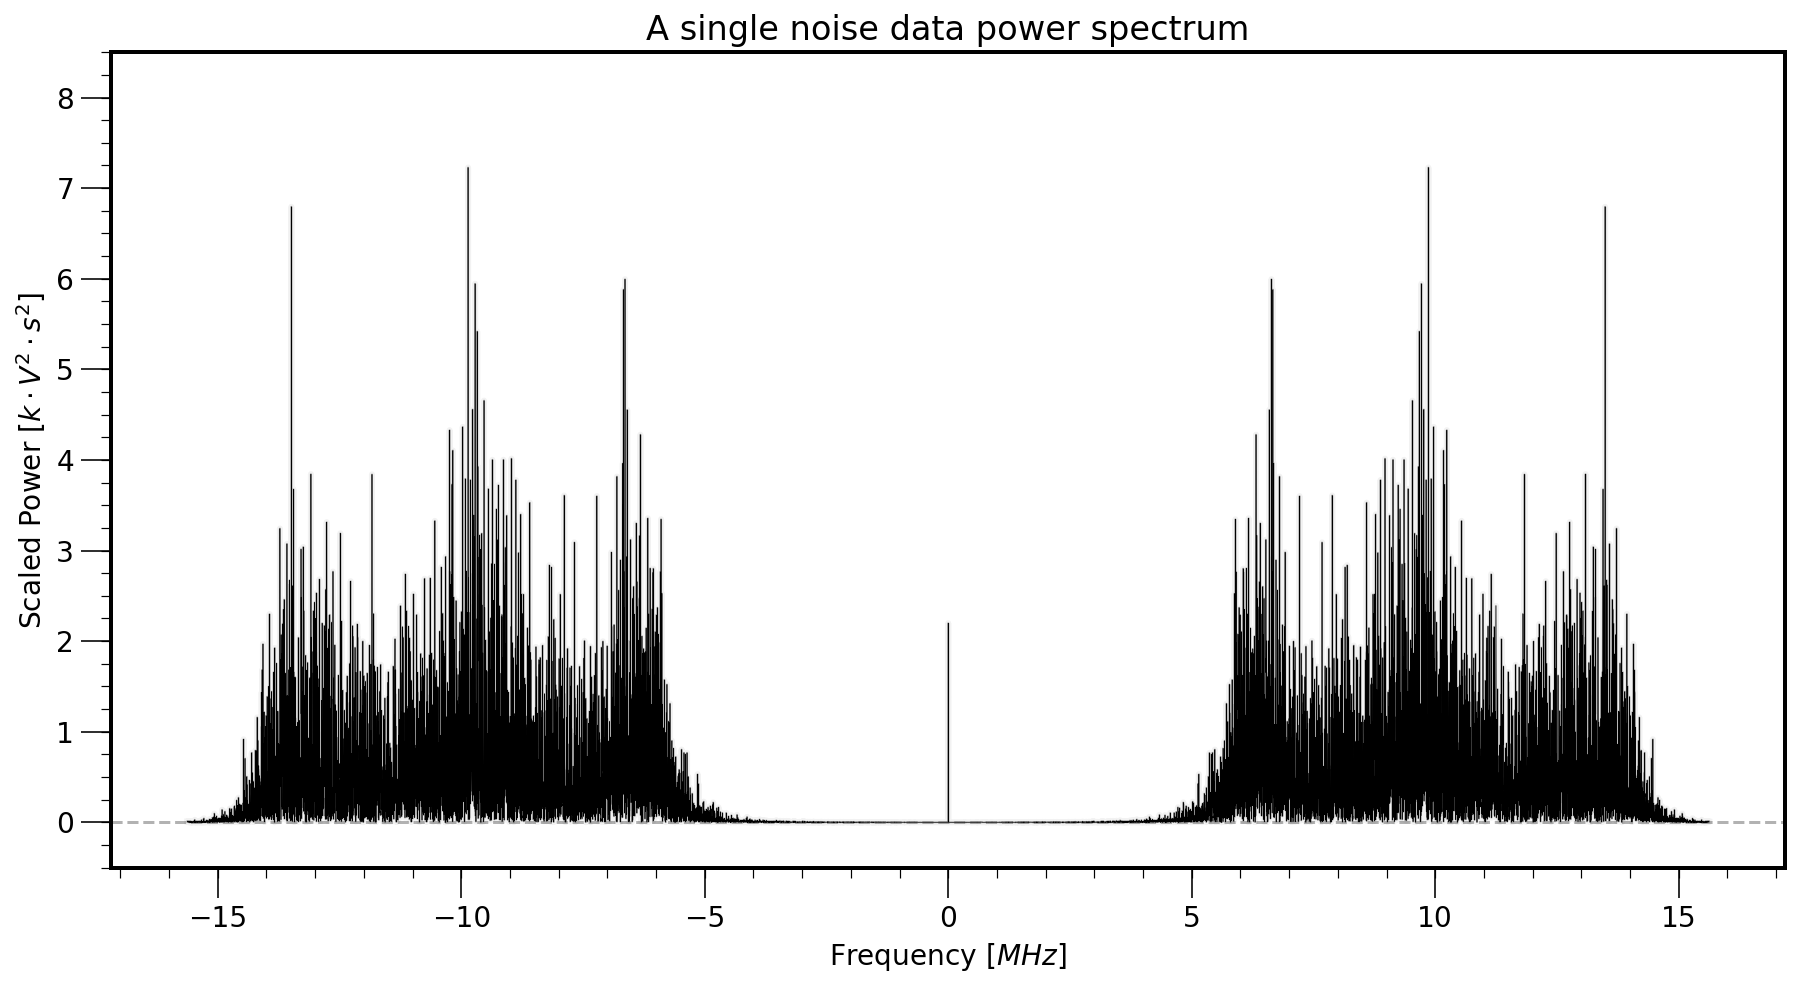

In [58]:
fig, ax = plt.subplots(figsize = (15,7.5))

PLOT_SCALE = 1e12

ax.plot(dft_f_range,
        noise_PF[0]/ PLOT_SCALE,
        color = 'black',
        linewidth = 0.3,
        alpha = 1, zorder = 3)

ax.plot(dft_f_range,
        noise_PF[0] / PLOT_SCALE,
        color = 'grey',
        linewidth = 1,
        alpha = 0.5, zorder = 2)

ax.plot(dft_f_range,
        noise_PF[0] / PLOT_SCALE,
        color = 'grey',
        linewidth = 3,
        alpha = 0.1, zorder = 0)

# Plot baseline
ax.axhline(0, color = 'black', ls = '--', alpha = 0.3, zorder = 0)

ax.set_ylim(-0.5,8.5)
# ax.set_xlim(-6.4, 6.4)
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(.25)) 
ax.tick_params(which='major', length = 15)
ax.tick_params(which='minor', length = 5)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1)) 

ax.set_xlabel(r'Frequency $[MHz]$')
ax.set_ylabel(r'Scaled Power $[k \cdot V^2 \cdot s^2]$')

ax.set_title('A single noise data power spectrum')
fig.savefig('average_noise_power_1_3_7.pdf', dpi = 'figure', format = 'pdf', transparent = True)


plt.show()

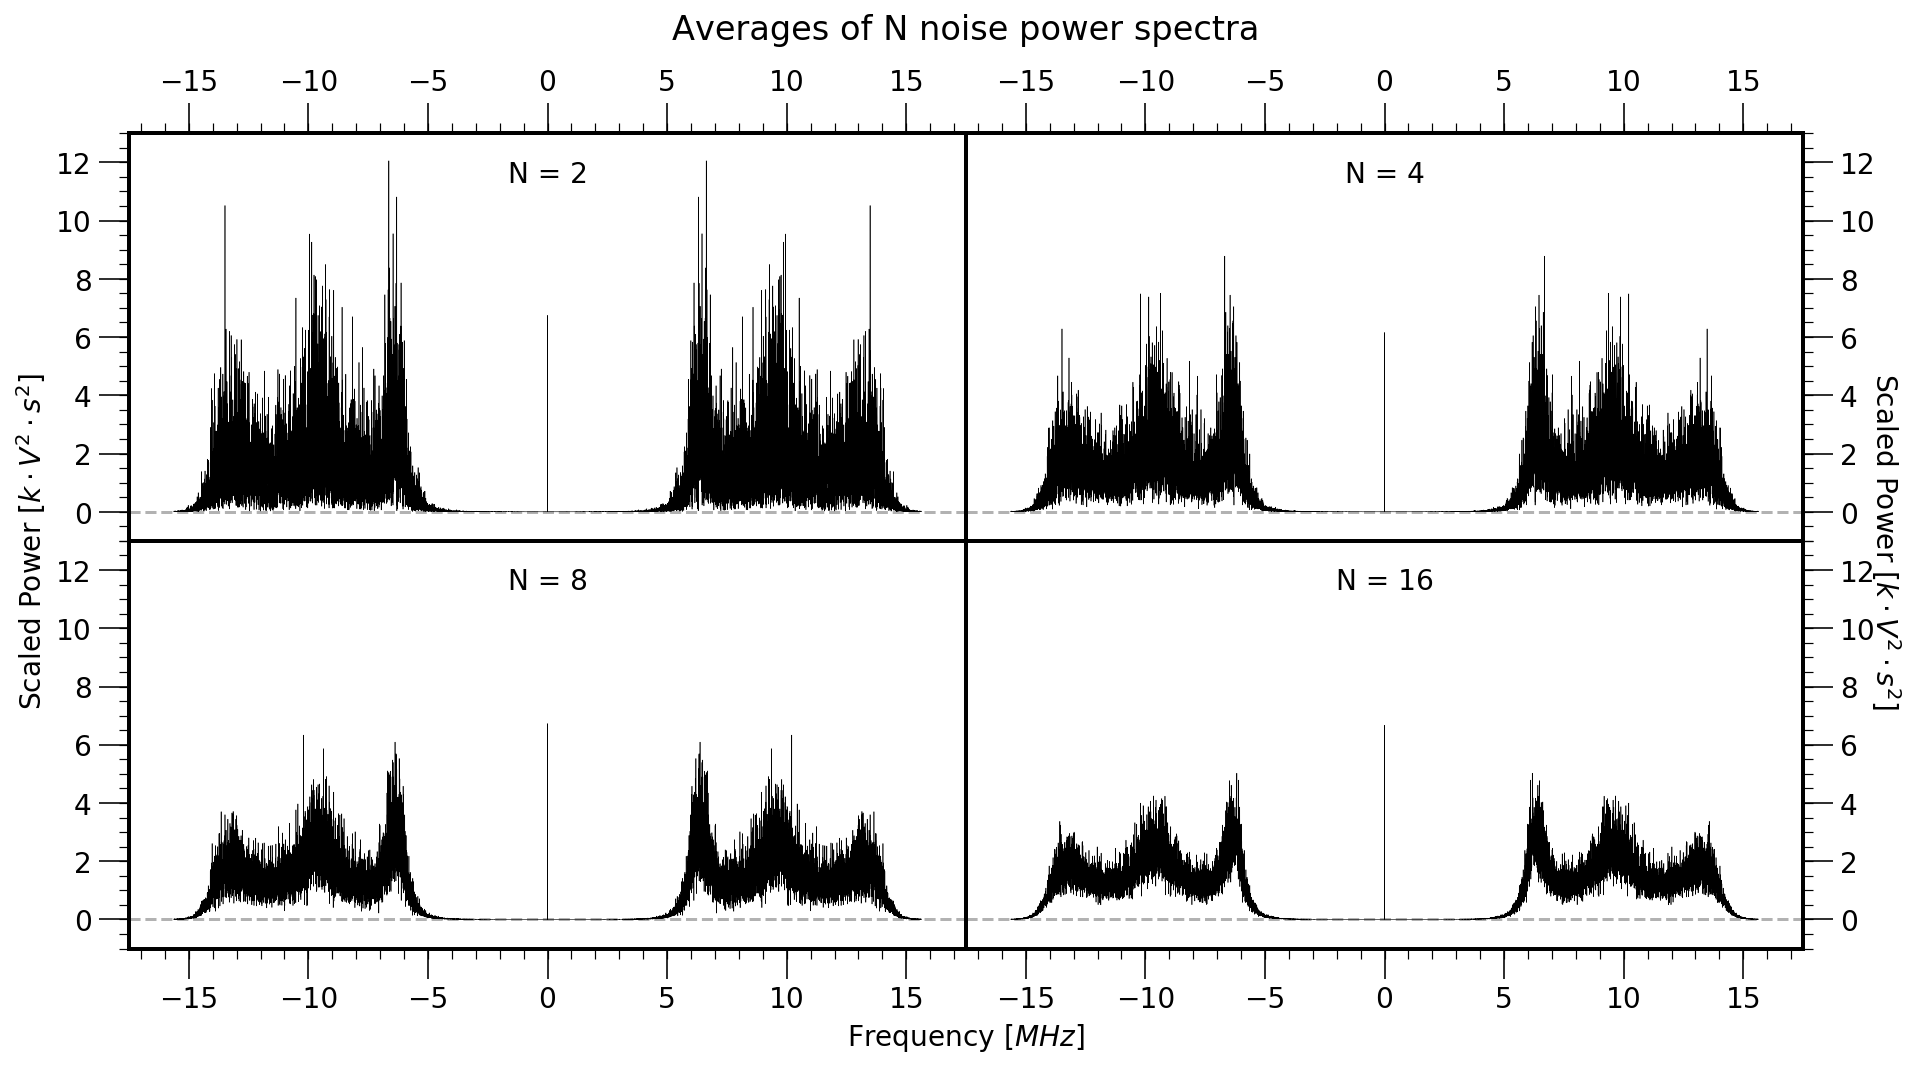

In [59]:
N_avg = 2**np.arange(1,5)

PLOT_SCALE = 1e12 / 2.5

# avg_noise_PF = np.mean(noise_PF_data, axis = 0)

fig, axes = plt.subplots(2,2,figsize = (15,7.5))

for i , ax in enumerate(axes.reshape(-1)):
    
    avg_noise_PF_i = np.mean(noise_PF[:N_avg[i]], axis = 0)/ PLOT_SCALE
        
    ax.plot(dft_f_range,
            avg_noise_PF_i,
            color = 'black',
            linewidth = 0.3,
            alpha = 1, zorder = 3)
    
    # Plot baseline
    ax.axhline(0, color = 'black', ls = '--', alpha = 0.3, zorder = 0)
    
    ax.set_ylim(-1,13)
    ax.set_xlim(-17.5,17.5)
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.text(0.5, 0.9,
            'N = %d' %(N_avg[i]),
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)

        # set ticks for left side of plotgrid
    if (i % 2) == 0:
        ax.yaxis.set_major_locator(MultipleLocator(2))
        ax.yaxis.set_minor_locator(MultipleLocator(0.5)) 
        ax.tick_params(which='major', length = 15)
        ax.tick_params(which='minor', length = 5)    
        
        # set ticks for right side of plotgrid        
    if (i % 2) == 1:
        ax_right = ax.twinx()
        ax_right.set_ylim(ax.get_ylim())
        ax_right.yaxis.set_major_locator(MultipleLocator(2))
        ax_right.yaxis.set_minor_locator(MultipleLocator(0.5)) 
        ax_right.tick_params(which='major', length = 15)
        ax_right.tick_params(which='minor', length = 5)
        
    #     # set ticks for top side of plotgrid
    if i < 2:
        ax_top = ax.twiny()
        ax_top.set_xlim(ax.get_xlim())
#         ax_top.set_xticks(np.arange(-3,4))
        ax_top.xaxis.set_major_locator(MultipleLocator(5))
        ax_top.xaxis.set_minor_locator(MultipleLocator(1))  
        ax_top.tick_params(which='major', length = 15)
        ax_top.tick_params(which='minor', length = 5)
    
#     # set ticks for bottom side of plotgrid
    if i > 1:

#         ax.set_xticks(np.arange(-3,4))
        ax.xaxis.set_major_locator(MultipleLocator(5))
        ax.xaxis.set_minor_locator(MultipleLocator(1))
        ax.tick_params(which='major', length = 15)
        ax.tick_params(which='minor', length = 5)
        
    if i == 0:
        ax.set_ylabel(r'Scaled Power $[k \cdot V^2 \cdot s^2]$', x = 0, y = 0)
    
    if i == 1:
        ax.set_ylabel(r'Scaled Power $[k \cdot V^2 \cdot s^2]$', rotation = 270, labelpad = 50, x= 0, y = 0)
        ax.yaxis.set_label_position('right')
        
    if i == 2:
        ax.set_xlabel(r'Frequency $[MHz]$', x = 1, y = 0)
    
    if i == 1:
        ax.set_title(r'Averages of N noise power spectra', x = 0, y = 1.2)

    
plt.subplots_adjust(hspace=0, wspace = 0)  

fig.savefig('average_noise_power_N_3_7.pdf', dpi = 'figure', format = 'pdf', transparent = True)

plt.show()

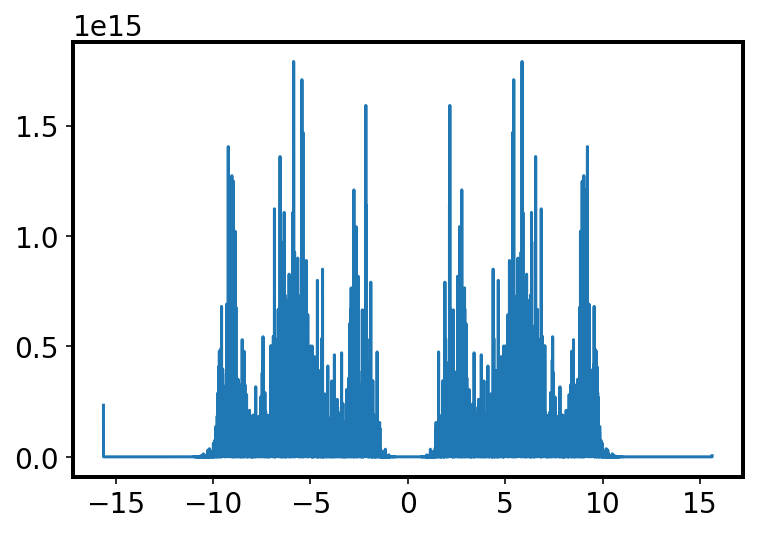

In [61]:
c = np.correlate(noise_data[0],noise_data[0], 'same')
cfft = np.fft.fft(c)
cpf = np.abs(cfft)**2
plt.plot(dft_f_range, cpf)
plt.show()

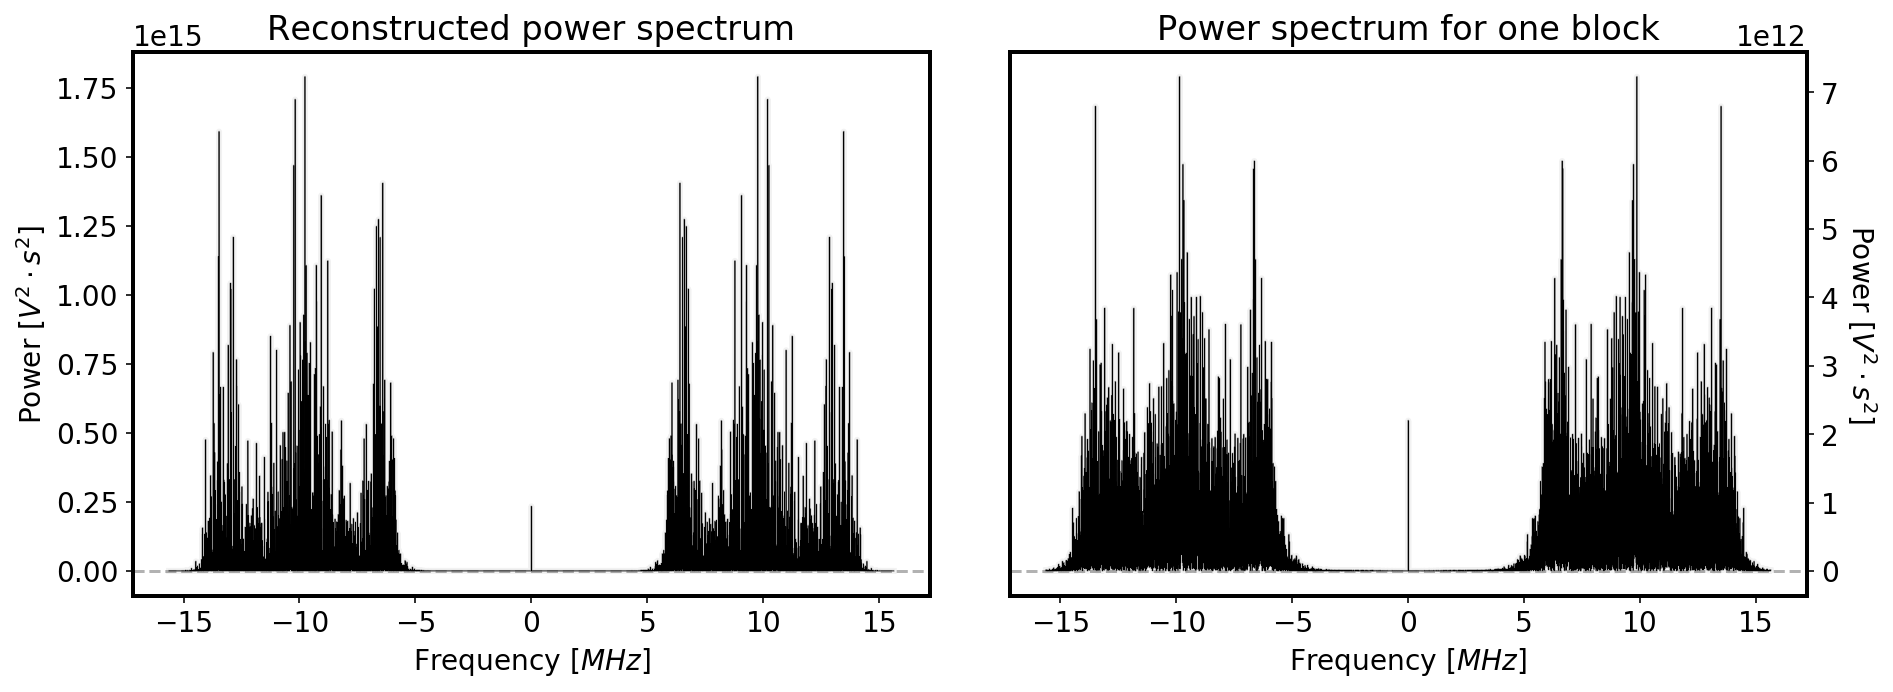

In [82]:
fig, axes = plt.subplots(1,2, figsize = (15,5))

PLOT_SCALE = 1

axes[0].plot(dft_f_range,
        np.fft.fftshift(cpf)/ PLOT_SCALE,
        color = 'black',
        linewidth = 0.3,
        alpha = 1, zorder = 3)

axes[0].plot(dft_f_range,
        np.fft.fftshift(cpf) / PLOT_SCALE,
        color = 'grey',
        linewidth = 1,
        alpha = 0.5, zorder = 2)

axes[0].plot(dft_f_range,
        np.fft.fftshift(cpf) / PLOT_SCALE,
        color = 'grey',
        linewidth = 3,
        alpha = 0.1, zorder = 0)

# Plot baseline
# ax[0].axhline(0, color = 'black', ls = '--', alpha = 0.3, zorder = 0)

# ax.set_ylim(-0.1,3.1)
# ax.set_xlim(-6.4, 6.4)
# ax.yaxis.set_major_locator(MultipleLocator(0.5))
# ax.yaxis.set_minor_locator(MultipleLocator(.1)) 
# ax.tick_params(which='major', length = 15)
# ax.tick_params(which='minor', length = 5)
# ax.xaxis.set_major_locator(MultipleLocator(5))
# ax.xaxis.set_minor_locator(MultipleLocator(1)) 

axes[0].set_ylabel(r'Power $[V^2 \cdot s^2]$')
axes[1].set_ylabel(r'Power $[V^2 \cdot s^2]$', rotation = 270, labelpad = 20)
axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position('right')

axes[0].set_title('Reconstructed power spectrum')
axes[1].set_title('Power spectrum for one block')


# fig.savefig('average_noise_power_3_7.pdf', dpi = 'figure', format = 'pdf', transparent = True)


axes[1].plot(dft_f_range,
        noise_PF[0]/ PLOT_SCALE,
        color = 'black',
        linewidth = 0.3,
        alpha = 1, zorder = 3)

axes[1].plot(dft_f_range,
        noise_PF[0] / PLOT_SCALE,
        color = 'grey',
        linewidth = 1,
        alpha = 0.5, zorder = 2)

axes[1].plot(dft_f_range,
        noise_PF[0] / PLOT_SCALE,
        color = 'grey',
        linewidth = 3,
        alpha = 0.1, zorder = 0)

# Plot baseline

for ax in axes:
    ax.axhline(0, color = 'black', ls = '--', alpha = 0.3, zorder = 0)
    ax.set_xlabel(r'Frequency $[MHz]$')


plt.subplots_adjust(hspace=0, wspace = 0.1)  
plt.show()
fig.savefig('acf_3_7.pdf', dpi = 'figure', format = 'pdf', transparent = True)


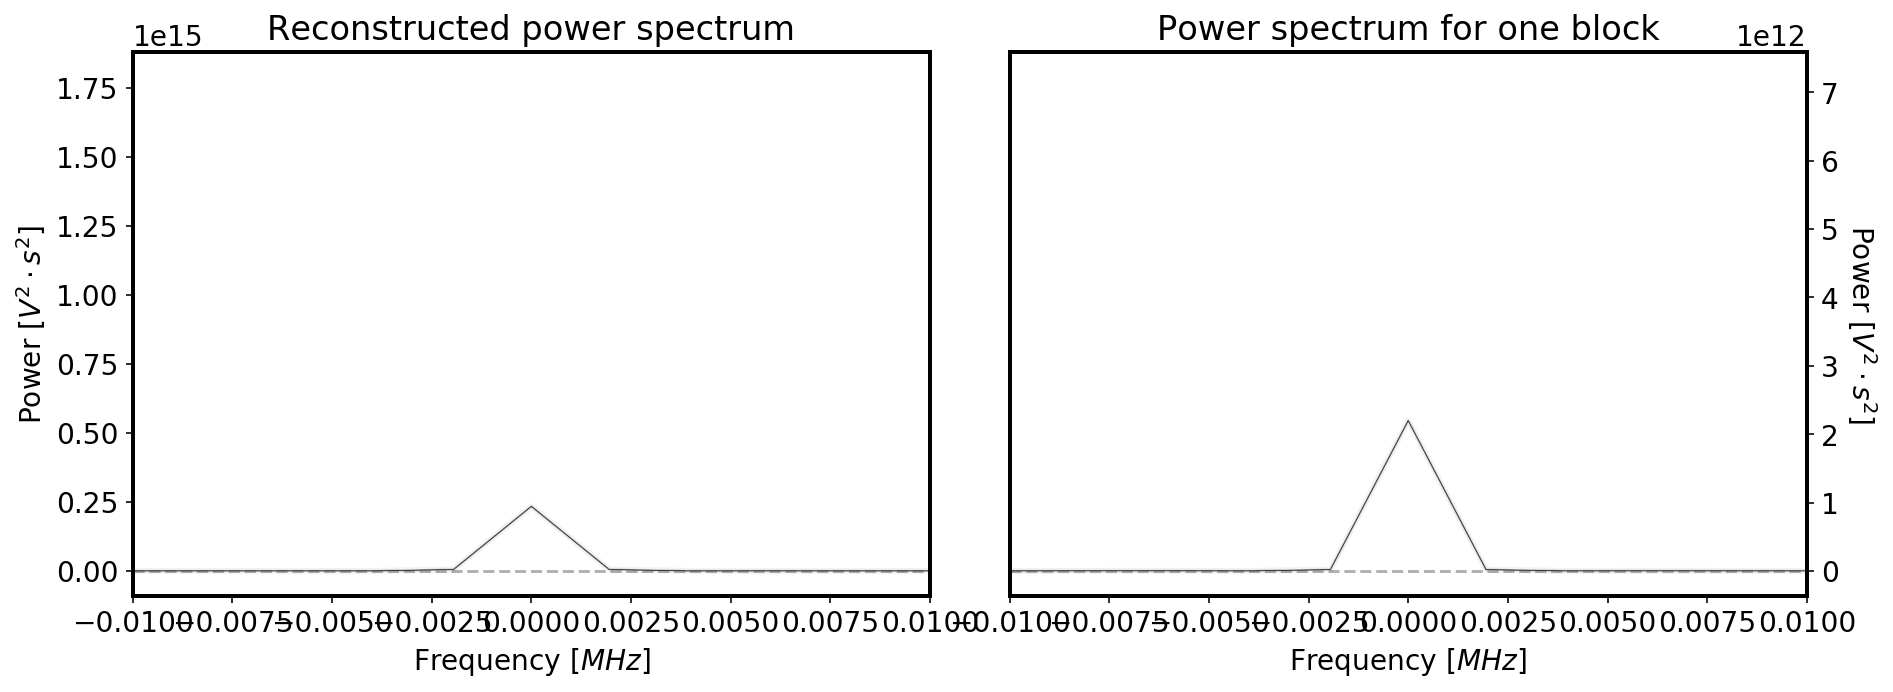

In [86]:
fig, axes = plt.subplots(1,2, figsize = (15,5))

PLOT_SCALE = 1

axes[0].plot(dft_f_range,
        np.fft.fftshift(cpf)/ PLOT_SCALE,
        color = 'black',
        linewidth = 0.3,
        alpha = 1, zorder = 3)

axes[0].plot(dft_f_range,
        np.fft.fftshift(cpf) / PLOT_SCALE,
        color = 'grey',
        linewidth = 1,
        alpha = 0.5, zorder = 2)

axes[0].plot(dft_f_range,
        np.fft.fftshift(cpf) / PLOT_SCALE,
        color = 'grey',
        linewidth = 3,
        alpha = 0.1, zorder = 0)

# Plot baseline
# ax[0].axhline(0, color = 'black', ls = '--', alpha = 0.3, zorder = 0)

# ax.set_ylim(-0.1,3.1)
# ax.set_xlim(-6.4, 6.4)
# ax.yaxis.set_major_locator(MultipleLocator(0.5))
# ax.yaxis.set_minor_locator(MultipleLocator(.1)) 
# ax.tick_params(which='major', length = 15)
# ax.tick_params(which='minor', length = 5)
# ax.xaxis.set_major_locator(MultipleLocator(5))
# ax.xaxis.set_minor_locator(MultipleLocator(1)) 

axes[0].set_ylabel(r'Power $[V^2 \cdot s^2]$')
axes[1].set_ylabel(r'Power $[V^2 \cdot s^2]$', rotation = 270, labelpad = 20)
axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position('right')

axes[0].set_title('Reconstructed power spectrum')
axes[1].set_title('Power spectrum for one block')


# fig.savefig('average_noise_power_3_7.pdf', dpi = 'figure', format = 'pdf', transparent = True)


axes[1].plot(dft_f_range,
        noise_PF[0]/ PLOT_SCALE,
        color = 'black',
        linewidth = 0.3,
        alpha = 1, zorder = 3)

axes[1].plot(dft_f_range,
        noise_PF[0] / PLOT_SCALE,
        color = 'grey',
        linewidth = 1,
        alpha = 0.5, zorder = 2)

axes[1].plot(dft_f_range,
        noise_PF[0] / PLOT_SCALE,
        color = 'grey',
        linewidth = 3,
        alpha = 0.1, zorder = 0)

# Plot baseline
axes[0].set_xlim([-.01, .01])
axes[1].set_xlim([-.01, .01])
for ax in axes:
    ax.axhline(0, color = 'black', ls = '--', alpha = 0.3, zorder = 0)
    ax.set_xlabel(r'Frequency $[MHz]$')


plt.subplots_adjust(hspace=0, wspace = 0.1)  
plt.show()
# fig.savefig('acf_3_7.pdf', dpi = 'figure', format = 'pdf', transparent = True)

